Grupo 2:

- Augusto Chebel Machado  RA: 231762

- João Pedro Marretto Helmeister RA: 174564

- Lucas Massabni Busnardo RA: 182516

- Matheus Rodrigues  RA: 185315

- Nathan Czelusniak de Siqueira RA: 186041

- Vinícius Consentino Muniz RA: 245271



In [1]:
# Instalando duas bibliotecas: ortools serve para usar ferramentas de PO e gspread para importar os dados do Google Sheets.

!pip install ortools --quiet
!pip install gspread

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 32.7 MB/s eta 0:00:00


In [2]:
#Código que importa dados do Google Sheets

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [3]:
#Importando outras bibliotecas importantes para o problema.

import pandas as pd
import numpy as np
from ortools.linear_solver import pywraplp
from google.colab import files
import matplotlib.pyplot as plt



In [4]:
# Importando os nossos dados do problema

worksheet = gc.open('Dados Trabalho de PO Completo 2022').sheet1

# Fazendo um Data Frame dos nossos dados. # Mostra a planilha com os dados completos (nome+valores)
df0=pd.DataFrame(worksheet.get_all_records())
df0


,xit,1,2,3,4,5,6,7,8,9,10,11,12,fi,vcit,vtit,stit,scit,hcit
0,VESTIDO TR LAÇO VELUDO,100.0,214.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,235.00,130.27,80.0,240.0,108.0,0.5
1,CROPPED LACO VELUDO,100.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,458.0,114.00,65.77,12.0,120.0,54.0,0.5
2,CASACO MULTICOLORS LUREX,162.0,222.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140.00,82.51,16.0,120.0,54.0,0.5
3,TOP CRUZADO COM LISTRAS,99.0,154.0,0.0,187.0,0.0,0.0,217.0,0.0,0.0,0.0,0.0,0.0,115.00,68.23,16.0,120.0,54.0,0.5
4,SAIA INSIDE,133.0,139.0,0.0,186.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,134.00,70.51,18.0,120.0,54.0,0.5
5,VESTIDO EVA TRICOT LISTRADO NERVURA,65.0,88.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,160.0,208.00,110.88,60.0,240.0,108.0,0.5
6,SAIA NERVURAS LISTRADA CEREJA,0.0,163.0,0.0,0.0,0.0,30.0,0.0,660.0,0.0,0.0,0.0,0.0,165.00,70.51,18.0,120.0,54.0,0.5
7,CASACO MISSONI (TAMI) CORAL,0.0,20.0,0.0,0.0,459.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,254.00,68.01,14.0,120.0,54.0,0.5
8,BLUSA LISTRA COLOR TERMO,0.0,93.0,263.0,147.0,423.0,0.0,0.0,0.0,0.0,268.0,0.0,0.0,104.00,56.79,12.0,90.0,40.5,0.5
9,CALÇA LISTRA MARRAKESH,0.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115.00,66.72,48.0,120.0,54.0,0.5


In [ ]:
# Importanto dados de um arquivo excel.

#Professor, caso seja necessário importar os dados de um arquivo excel, você pode tirar as "#" do código abaixo. Além disso, faça o upload do arquivo excel na aba no canto esquerdo da página, onde tem um ícone de documento, por favor.

# df0=pd.read_excel("Dados Trabalho de PO Completo 2022.xlsx", index_col = "xit")
# df0

In [5]:
#Tirando a coluna 1 do nosso data frame, a qual possuia o nome das peças. Queremos trabalhar apenas com os dados numéricos a partir de agora.

df=df0.drop(columns="xit")
df

,1,2,3,4,5,6,7,8,9,10,11,12,fi,vcit,vtit,stit,scit,hcit
0,100.0,214.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,235.00,130.27,80.0,240.0,108.0,0.5
1,100.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,458.0,114.00,65.77,12.0,120.0,54.0,0.5
2,162.0,222.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140.00,82.51,16.0,120.0,54.0,0.5
3,99.0,154.0,0.0,187.0,0.0,0.0,217.0,0.0,0.0,0.0,0.0,0.0,115.00,68.23,16.0,120.0,54.0,0.5
4,133.0,139.0,0.0,186.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,134.00,70.51,18.0,120.0,54.0,0.5
5,65.0,88.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,160.0,208.00,110.88,60.0,240.0,108.0,0.5
6,0.0,163.0,0.0,0.0,0.0,30.0,0.0,660.0,0.0,0.0,0.0,0.0,165.00,70.51,18.0,120.0,54.0,0.5
7,0.0,20.0,0.0,0.0,459.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,254.00,68.01,14.0,120.0,54.0,0.5
8,0.0,93.0,263.0,147.0,423.0,0.0,0.0,0.0,0.0,268.0,0.0,0.0,104.00,56.79,12.0,90.0,40.5,0.5
9,0.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115.00,66.72,48.0,120.0,54.0,0.5


In [6]:
# Indentificando colunas importantes para a resolução do trabalho com os nomes técnicos, os quais vão ser usados ao longo do código.

columns = df.columns

#coluna

nome_fi = "fi"
nome_vcit = "vcit"
nome_vtit = "vtit"
nome_stit = "stit"
nome_hcit = "hcit"
nome_scit = "scit"


fi = columns.get_loc(nome_fi)
vcit = columns.get_loc(nome_vcit)
vtit = columns.get_loc(nome_vtit)
stit = columns.get_loc(nome_stit)
hcit = columns.get_loc(nome_hcit)
scit = columns.get_loc(nome_scit)

#column_index

print("Index da coluna", nome_fi, "é" , fi)
print("Index da coluna", nome_vcit, "é" , vcit)
print("Index da coluna", nome_vtit, "é" , vtit)
print("Index da coluna", nome_stit, "é" , stit)
print("Index da coluna", nome_scit, "é" , scit)
print("Index da coluna", nome_hcit, "é" , hcit)


Index da coluna fi é 12
Index da coluna vcit é 13
Index da coluna vtit é 14
Index da coluna stit é 15
Index da coluna scit é 16
Index da coluna hcit é 17


In [7]:
#Transformando os dados em um Array
matriz=df.to_numpy()


In [8]:
#Criando um problema em PO
solver = pywraplp.Solver.CreateSolver('SCIP') # O SCIP é o Solver que resolve o problema inteiro.

In [9]:
# Adicionando as variáveis

maq = 2

x= {(i,k,t):solver.IntVar(lb=0,ub=solver.infinity(),name=f'x_{i+1}_{k+1}_{t+1}') # xikt: quantidade produzida de cada produto i na máquina k no período t
      for i in range(len(matriz))
      for k in range(0,maq)
      for t in range(0,12)}
print(x)

i=0
h = {(i,t):solver.IntVar(lb=0,ub=solver.infinity(),name=f'h_{i+1}_{t}') # hit: quantidade estocada de cada produto i no período t.
      for i in range(len(matriz))
      for t in range(0,13)}
print(h)

i=0
y= {(i,k,t):solver.BoolVar(name=f'y_{i+1}_{k+1}_{t+1}')  # yikt: variável binária indicando se foi ou não produzido o produto i na máquina k no período t.
        for i in range(len(matriz))
        for k in range(0,maq)
        for t in range(0,12)}
print(y)

{(0, 0, 0): x_1_1_1, (0, 0, 1): x_1_1_2, (0, 0, 2): x_1_1_3, (0, 0, 3): x_1_1_4, (0, 0, 4): x_1_1_5, (0, 0, 5): x_1_1_6, (0, 0, 6): x_1_1_7, (0, 0, 7): x_1_1_8, (0, 0, 8): x_1_1_9, (0, 0, 9): x_1_1_10, (0, 0, 10): x_1_1_11, (0, 0, 11): x_1_1_12, (0, 1, 0): x_1_2_1, (0, 1, 1): x_1_2_2, (0, 1, 2): x_1_2_3, (0, 1, 3): x_1_2_4, (0, 1, 4): x_1_2_5, (0, 1, 5): x_1_2_6, (0, 1, 6): x_1_2_7, (0, 1, 7): x_1_2_8, (0, 1, 8): x_1_2_9, (0, 1, 9): x_1_2_10, (0, 1, 10): x_1_2_11, (0, 1, 11): x_1_2_12, (1, 0, 0): x_2_1_1, (1, 0, 1): x_2_1_2, (1, 0, 2): x_2_1_3, (1, 0, 3): x_2_1_4, (1, 0, 4): x_2_1_5, (1, 0, 5): x_2_1_6, (1, 0, 6): x_2_1_7, (1, 0, 7): x_2_1_8, (1, 0, 8): x_2_1_9, (1, 0, 9): x_2_1_10, (1, 0, 10): x_2_1_11, (1, 0, 11): x_2_1_12, (1, 1, 0): x_2_2_1, (1, 1, 1): x_2_2_2, (1, 1, 2): x_2_2_3, (1, 1, 3): x_2_2_4, (1, 1, 4): x_2_2_5, (1, 1, 5): x_2_2_6, (1, 1, 6): x_2_2_7, (1, 1, 7): x_2_2_8, (1, 1, 8): x_2_2_9, (1, 1, 9): x_2_2_10, (1, 1, 10): x_2_2_11, (1, 1, 11): x_2_2_12, (2, 0, 0): x_3_1_1,

In [10]:
# Adicionando a função objetivo do problema.

solver.Maximize(sum(x[(i,k,t)]*(matriz[i][fi]-matriz[i][vcit]) for i in range(0,len(matriz)) for k in range (0,maq) for t in range(0,12))-
                sum(h[(i,t)]*(matriz[i][hcit]) for i in range(0,len(matriz)) for t in range(0,13))-
                sum(y[(i,k,t)]*(matriz[i][scit]) for i in range(0,len(matriz)) for k in range (0,maq) for t in range(0,12)))
print(solver.ExportModelAsLpFormat(obfuscated=False))

\ Generated by MPModelProtoExporter
\   Name             : 
\   Format           : Free
\   Constraints      : 0
\   Variables        : 2074
\     Binary         : 816
\     Integer        : 1258
\     Continuous     : 0
Maximize
 Obj: +104.73 x_1_1_1 +104.73 x_1_1_2 +104.73 x_1_1_3 +104.73 x_1_1_4 +104.73 x_1_1_5 +104.73 x_1_1_6 +104.73 x_1_1_7 +104.73 x_1_1_8 +104.73 x_1_1_9 +104.73 x_1_1_10 +104.73 x_1_1_11 +104.73 x_1_1_12 +104.73 x_1_2_1 +104.73 x_1_2_2 +104.73 x_1_2_3 +104.73 x_1_2_4 +104.73 x_1_2_5 +104.73 x_1_2_6 +104.73 x_1_2_7 +104.73 x_1_2_8 +104.73 x_1_2_9 +104.73 x_1_2_10 +104.73 x_1_2_11 +104.73 x_1_2_12 +48.23 x_2_1_1 +48.23 x_2_1_2 +48.23 x_2_1_3 +48.23 x_2_1_4 +48.23 x_2_1_5 +48.23 x_2_1_6 +48.23 x_2_1_7 +48.23 x_2_1_8 +48.23 x_2_1_9 +48.23 x_2_1_10 +48.23 x_2_1_11 +48.23 x_2_1_12 +48.23 x_2_2_1 +48.23 x_2_2_2 +48.23 x_2_2_3 +48.23 x_2_2_4 +48.23 x_2_2_5 +48.23 x_2_2_6 +48.23 x_2_2_7 +48.23 x_2_2_8 +48.23 x_2_2_9 +48.23 x_2_2_10 +48.23 x_2_2_11 +48.23 x_2_2_12 +57.49 x

In [11]:
#Adicionando as restrições de estoque
for i in range(len(matriz)):
  for t in range(0,12):
    solver.Add(sum(x[(i,k,t)] for k in range (0,maq)) + h[(i,t)] == matriz[i][t] + h[(i,t+1)])

In [12]:
#Adicionando a restrição que não posso produzir mais do que preciso
for i in range(len(matriz)):
  for k in range(0, maq):
    for t in range(0,12):
      solver.Add(x[(i,k,t)] <= sum(matriz[i][t:12])*y[(i,k,t)])

In [13]:
# Adicionando a restrição da disponibilidade de tempo

#Quem quiser pode variar as horas e os dias na semana que a empresa trabalha para avaliar cenários variados

min=60 # Quantos minutos tem 1 hora.
ho=24 # Horas no dia que a máquina trabalha
d=24  # Dias no mês que a máquina trabalha

Cap=d*ho*min
print(f'O total de minutos que a máquina vai operar neste dia é {Cap} minutos.')

for t in range(0,12):
  for k in range(0,maq):
    solver.Add(sum(x[(i,k,t)]*matriz[i][vtit] for i in range(0,len(matriz)))+ sum(y[(i,k,t)]*matriz[i][stit] for i in range(0,len(matriz)))<=Cap)

O total de minutos que a máquina vai operar neste dia é 34560 minutos.


In [14]:
#Zerando o estoque inicial e final pois se trata de um problema com horizonte temporal finito

t_estoque_0=[0,12]

for i in range(0,len(matriz)):
  for t in t_estoque_0:
    solver.Add(h[(i,t)]==0)

**Estruturação:**

In [15]:
# Mostra a formulação final do problema com a quantidade de variáveis e restrições.

print(solver.ExportModelAsLpFormat(obfuscated=False))

\ Generated by MPModelProtoExporter
\   Name             : 
\   Format           : Free
\   Constraints      : 1316
\   Variables        : 2074
\     Binary         : 816
\     Integer        : 1258
\     Continuous     : 0
Maximize
 Obj: +104.73 x_1_1_1 +104.73 x_1_1_2 +104.73 x_1_1_3 +104.73 x_1_1_4 +104.73 x_1_1_5 +104.73 x_1_1_6 +104.73 x_1_1_7 +104.73 x_1_1_8 +104.73 x_1_1_9 +104.73 x_1_1_10 +104.73 x_1_1_11 +104.73 x_1_1_12 +104.73 x_1_2_1 +104.73 x_1_2_2 +104.73 x_1_2_3 +104.73 x_1_2_4 +104.73 x_1_2_5 +104.73 x_1_2_6 +104.73 x_1_2_7 +104.73 x_1_2_8 +104.73 x_1_2_9 +104.73 x_1_2_10 +104.73 x_1_2_11 +104.73 x_1_2_12 +48.23 x_2_1_1 +48.23 x_2_1_2 +48.23 x_2_1_3 +48.23 x_2_1_4 +48.23 x_2_1_5 +48.23 x_2_1_6 +48.23 x_2_1_7 +48.23 x_2_1_8 +48.23 x_2_1_9 +48.23 x_2_1_10 +48.23 x_2_1_11 +48.23 x_2_1_12 +48.23 x_2_2_1 +48.23 x_2_2_2 +48.23 x_2_2_3 +48.23 x_2_2_4 +48.23 x_2_2_5 +48.23 x_2_2_6 +48.23 x_2_2_7 +48.23 x_2_2_8 +48.23 x_2_2_9 +48.23 x_2_2_10 +48.23 x_2_2_11 +48.23 x_2_2_12 +57.4

**Resultados:**

In [16]:
#Pedindo para o Solver resolver o problema.
solver.Solve();

In [17]:
# Printando o resultado do problema

obj=solver.Objective().Value()
print(f'A empresa teve um lucro maximizado de {obj} reais\n')
c=0
d=0
f=0
#Printando os valores das variáveis diferentes de 0.
print('\nProdutos produzidos em cada período e máquina e sua respectiva quantidade:\n')
for i in x.values():
  if i.solution_value() > 0:
    print(i,'=',i.solution_value())
    c+=1
print(f'\nHouve {c} processos produtivos no ano, calculado a partir da variável xit.\n')


print('\nProdutos estocados em cada período e sua respectiva quantidade:\n')
for i in h.values():
  if i.solution_value() > 0:
    print(i,'=',i.solution_value())
    d+=1
print(f'\nHouve {d} processos de estoque no ano.\n')

print('\n Períodos e máquinas em que cada produto foi produzido:\n')
for i in y.values():
  if i.solution_value() > 0:
    print(i,'=',i.solution_value())
    f+=1
print(f'\nHouve {f} processos produtivos no ano, calculados pela variável yikt, valor consoante ao calculado a partir do xikt.\n')







A empresa teve um lucro maximizado de 1123899.77 reais


Produtos produzidos em cada período e máquina e sua respectiva quantidade:

x_1_2_1 = 314.0
x_1_2_4 = 120.0
x_2_1_3 = 80.0
x_2_1_10 = 80.0
x_2_2_1 = 100.0
x_2_2_12 = 458.0
x_3_1_3 = 255.0
x_3_2_1 = 162.0
x_3_2_2 = 222.0
x_4_1_2 = 154.0
x_4_1_4 = 187.0
x_4_2_1 = 99.0
x_4_2_7 = 217.0
x_5_1_2 = 139.0
x_5_2_1 = 133.0
x_5_2_4 = 186.0
x_6_1_1 = 153.0
x_6_1_12 = 160.0
x_6_2_8 = 36.0
x_7_1_2 = 163.0
x_7_1_8 = 660.0
x_7_2_6 = 30.0
x_8_1_2 = 20.0
x_8_2_5 = 459.0
x_9_1_4 = 147.0
x_9_1_5 = 423.0
x_9_2_2 = 93.0
x_9_2_3 = 263.0
x_9_2_10 = 268.0
x_10_1_2 = 95.0
x_11_1_2 = 15.0
x_11_1_4 = 515.0
x_11_1_6 = 130.0
x_11_1_9 = 376.0
x_12_2_2 = 10.0
x_12_2_9 = 224.0
x_13_1_2 = 35.0
x_13_1_5 = 220.0
x_13_1_8 = 261.0
x_14_2_2 = 30.0
x_14_2_6 = 222.0
x_15_1_9 = 84.0
x_15_2_2 = 9.0
x_15_2_4 = 149.0
x_16_1_6 = 287.0
x_16_1_8 = 378.0
x_16_2_2 = 30.0
x_17_1_3 = 154.0
x_17_1_6 = 287.0
x_17_1_7 = 110.0
x_18_1_3 = 19.0
x_18_1_9 = 187.0
x_19_1_4 = 38.0
x_19_2_7 

In [18]:
#Parâmetros de desempenho do modelo:

print(f'Os parâmetros de desempenho do modelo com {maq} máquina(s) são:')
print('\nO problema resolvido em %d iterações.' % solver.iterations())
print(f'\nO tempo computacional exigido para o código é: {round(solver.wall_time()/1000,2)} s.')
print(f'\nO número de nós exigidos no método Branch and Bound é {solver.nodes()} nós.')


Os parâmetros de desempenho do modelo com 2 máquina(s) são:

O problema resolvido em 1012 iterações.

O tempo computacional exigido para o código é: 26.06 s.

O número de nós exigidos no método Branch and Bound é 1 nós.


**Tratamento e Análise dos Resultados**

In [19]:
# Tabela bem simplificada com os valores das variáveis
# Pode ser usada para obtenção de informações - célula abaixo permite baixar no formato excel

dados=list()

for i in x.values():
  # print(i,'=',i.solution_value())
  dados.append([i,i.solution_value()])
for i in h.values():
  dados.append([i,i.solution_value()])
for i in y.values():
   dados.append([i,i.solution_value()])
print(dados)

dff=pd.DataFrame(dados,columns=["Produto","Quantidade"])
dff

[[x_1_1_1, 0.0], [x_1_1_2, 0.0], [x_1_1_3, 0.0], [x_1_1_4, 0.0], [x_1_1_5, 0.0], [x_1_1_6, 0.0], [x_1_1_7, 0.0], [x_1_1_8, 0.0], [x_1_1_9, 0.0], [x_1_1_10, 0.0], [x_1_1_11, 0.0], [x_1_1_12, 0.0], [x_1_2_1, 314.0], [x_1_2_2, 0.0], [x_1_2_3, 0.0], [x_1_2_4, 120.0], [x_1_2_5, 0.0], [x_1_2_6, 0.0], [x_1_2_7, 0.0], [x_1_2_8, 0.0], [x_1_2_9, 0.0], [x_1_2_10, 0.0], [x_1_2_11, 0.0], [x_1_2_12, 0.0], [x_2_1_1, 0.0], [x_2_1_2, 0.0], [x_2_1_3, 80.0], [x_2_1_4, 0.0], [x_2_1_5, 0.0], [x_2_1_6, 0.0], [x_2_1_7, 0.0], [x_2_1_8, 0.0], [x_2_1_9, 0.0], [x_2_1_10, 80.0], [x_2_1_11, 0.0], [x_2_1_12, 0.0], [x_2_2_1, 100.0], [x_2_2_2, 0.0], [x_2_2_3, 0.0], [x_2_2_4, 0.0], [x_2_2_5, 0.0], [x_2_2_6, 0.0], [x_2_2_7, 0.0], [x_2_2_8, 0.0], [x_2_2_9, 0.0], [x_2_2_10, 0.0], [x_2_2_11, 0.0], [x_2_2_12, 458.0], [x_3_1_1, 0.0], [x_3_1_2, 0.0], [x_3_1_3, 255.0], [x_3_1_4, 0.0], [x_3_1_5, 0.0], [x_3_1_6, 0.0], [x_3_1_7, 0.0], [x_3_1_8, 0.0], [x_3_1_9, 0.0], [x_3_1_10, 0.0], [x_3_1_11, 0.0], [x_3_1_12, 0.0], [x_3_2_1, 16

,Produto,Quantidade
0,x_1_1_1,0.0
1,x_1_1_2,0.0
2,x_1_1_3,0.0
3,x_1_1_4,0.0
4,x_1_1_5,0.0
...,...,...
2069,y_34_2_8,0.0
2070,y_34_2_9,0.0
2071,y_34_2_10,0.0
2072,y_34_2_11,0.0


In [20]:
#Baixando a tabela acima para excel.
dff.to_excel("ResultadosPO.xlsx",sheet_name="ResultadosPO",index=False,header=True,na_rep=" ")

In [21]:

# Alguns testes são feitos para validar se as restrições foram respeitadas

#Respeitou o tempo diponível?
tempo=np.arange(1,13,1)
ltempo=np.zeros(12)
ltempot=np.zeros(12)

# tratando das máquinas juntas
for j in range(0,12):
  ltempot[j]=(sum(x[(i,k,j)].solution_value()*matriz[i][vtit] + y[(i,k,j)].solution_value()*matriz[i][stit] for i in range(0,34) for k in range(0,maq)))
print(ltempot)


for k in range(0,maq):
  for j in range(0,12):
    ltempo[j]=(sum(x[(i,k,j)].solution_value()*matriz[i][vtit] + y[(i,k,j)].solution_value()*matriz[i][stit] for i in range(0,34)))
  print(ltempo)




[43030. 22890. 10850. 41380. 18206. 28520. 24052. 66198. 19398. 15596.
 42264. 50384.]
[ 9420. 14580.  7604. 20830. 11660. 12260.  2934. 32622. 16620.  6260.
 22440. 17684.]
[33610.  8310.  3246. 20550.  6546. 16260. 21118. 33576.  2778.  9336.
 19824. 32700.]


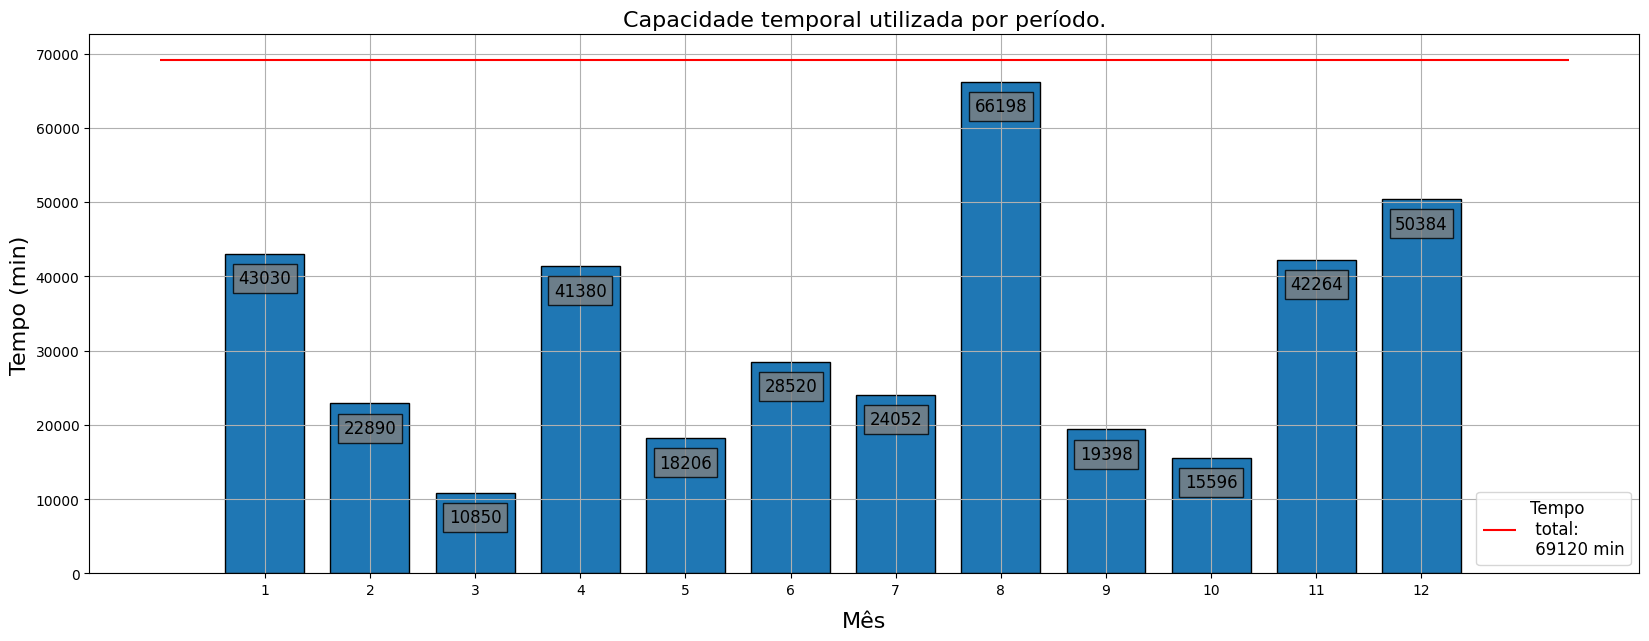

In [22]:
# Plotando um gráfico com os tempos de produção utilizados em cada perído

plt.figure(figsize=[20,7])
plt.grid()
plt.title("Capacidade temporal utilizada por período.", fontsize=16)
plt.xlabel("Mês",labelpad=10,fontsize=16)
plt.ylabel("Tempo (min)",fontsize=16)
plt.bar(tempo,ltempot,edgecolor='black',tick_label=tempo,width=0.75)
plt.hlines(maq*Cap,0,13.4,colors="r",label=f"Tempo \n total: \n {maq*Cap} min")
plt.legend(loc="lower right", fontsize=12)

for i in range(0,12):
  plt.text(i+0.75, ltempot[i]-4000, str(int(ltempot[i])),fontsize=12,bbox=dict(facecolor='grey',alpha=0.8))

plt.show()

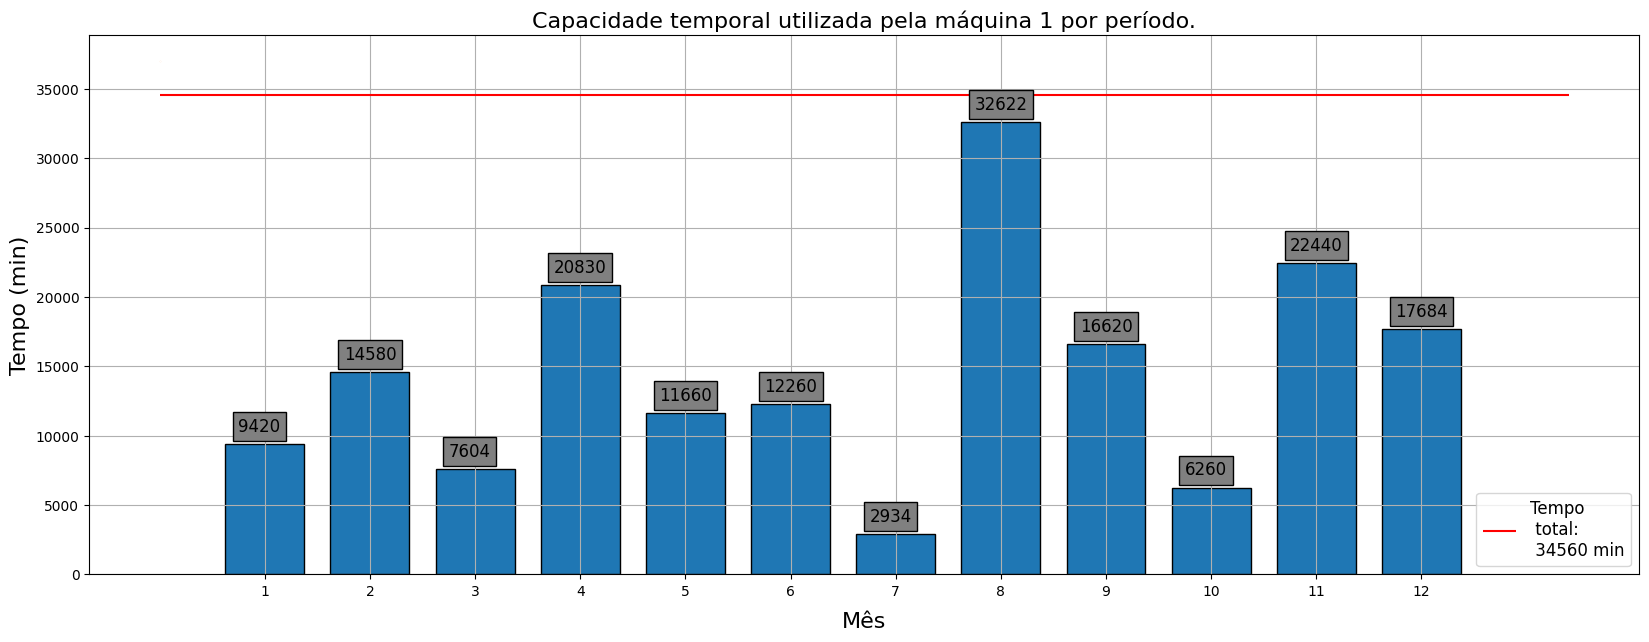

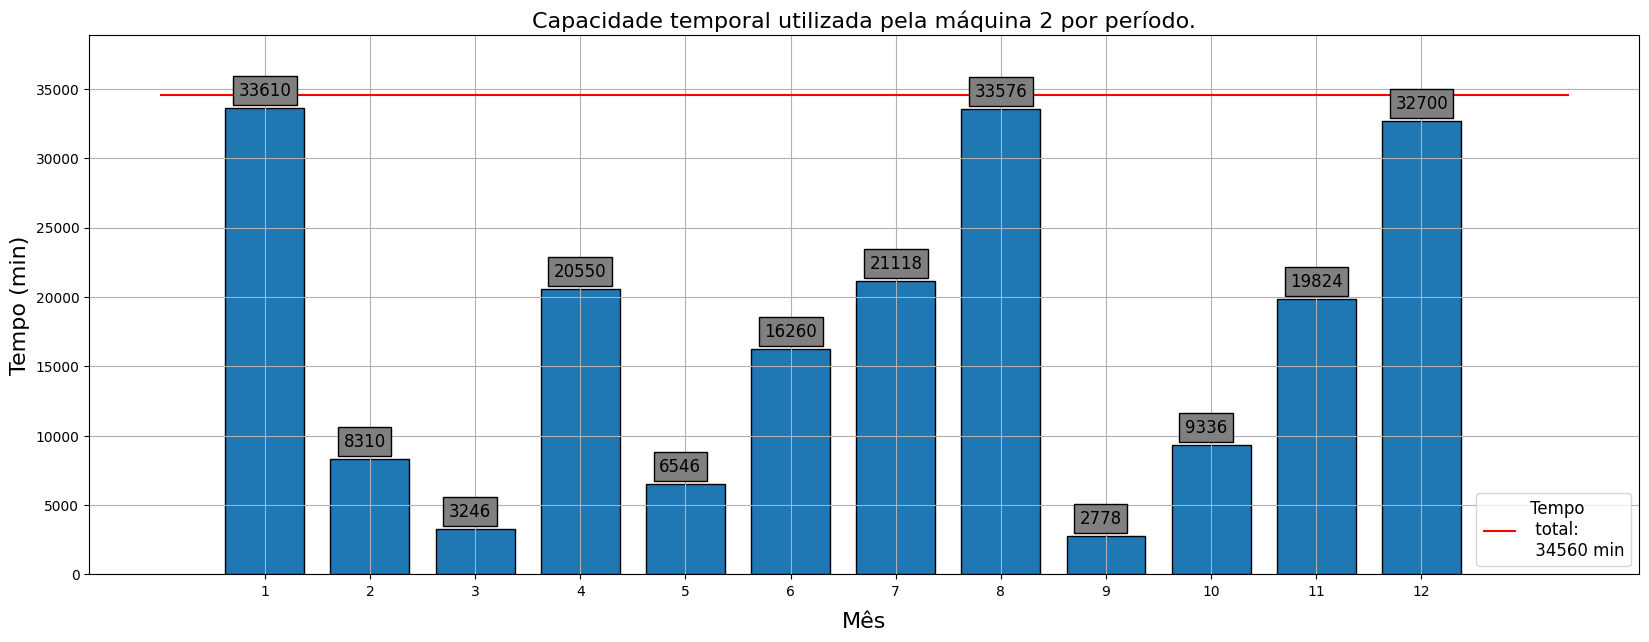

In [23]:
ltempo=np.zeros(12)
for k in range(0,maq):
  for j in range(0,12):
    ltempo[j]=(sum(x[(i,k,j)].solution_value()*matriz[i][vtit] + y[(i,k,j)].solution_value()*matriz[i][stit] for i in range(0,34)))
  plt.figure(figsize=[20,7])
  plt.grid()
  plt.title(f"Capacidade temporal utilizada pela máquina {k+1} por período.", fontsize=16)
  plt.xlabel("Mês",labelpad=10,fontsize=16)
  plt.ylabel("Tempo (min)",fontsize=16)
  plt.bar(tempo,ltempo,edgecolor='black',tick_label=tempo,width=0.75)
  plt.scatter(0,37000,s=0.001)
  plt.hlines(Cap,0,13.4,colors="r",label=f"Tempo \n total: \n {Cap} min")
  plt.legend(loc="lower right", fontsize=12)

  for i in range(0,12):
    plt.text(i+0.75, ltempo[i]+900, str(int(ltempo[i])),fontsize=12,bbox=dict(facecolor='grey',alpha=1))

  plt.show()

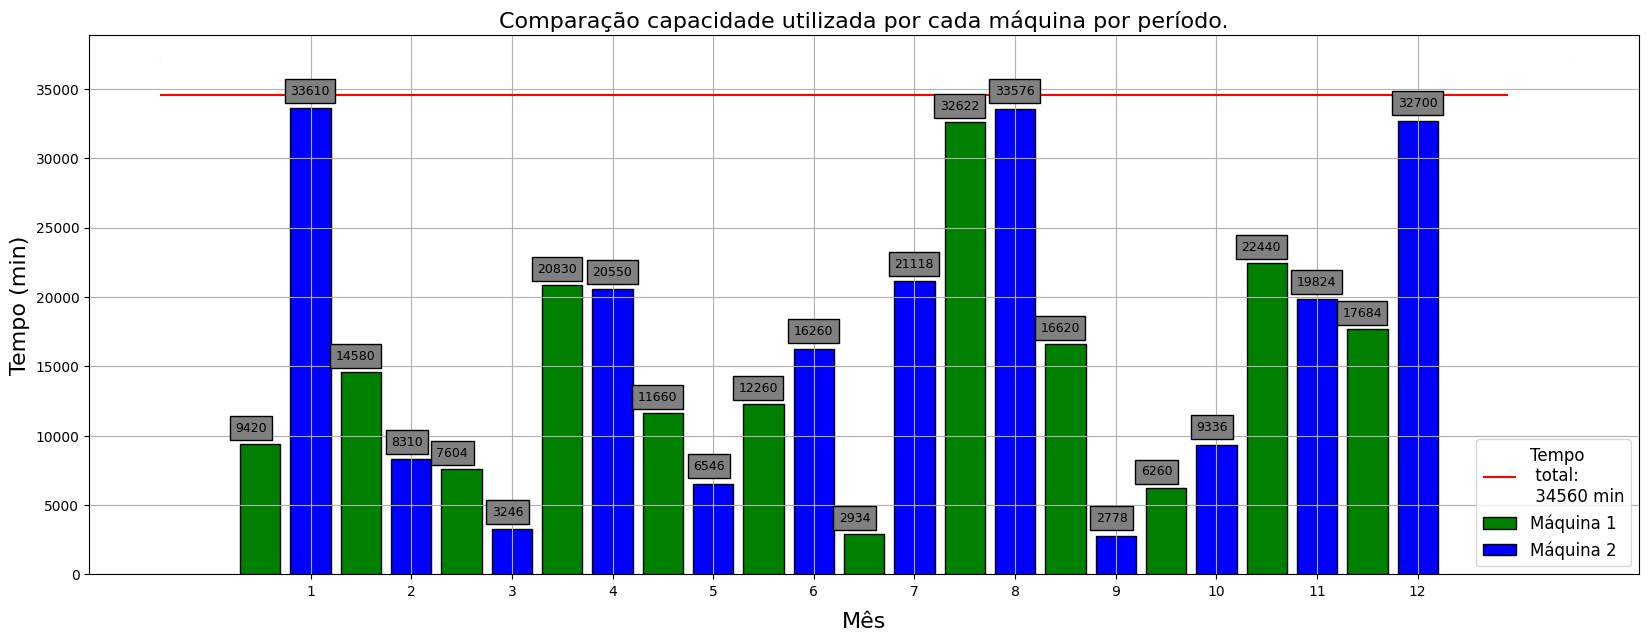

In [24]:

# cores={1:"b",2:"g"}
ltempo1=np.zeros(12)
ltempo2=np.zeros(12)
if maq==2:
  for j in range(0,12):
    ltempo1[j]=(sum(x[(i,0,j)].solution_value()*matriz[i][vtit] + y[(i,0,j)].solution_value()*matriz[i][stit] for i in range(0,34)))
    ltempo2[j]=(sum(x[(i,1,j)].solution_value()*matriz[i][vtit] + y[(i,1,j)].solution_value()*matriz[i][stit] for i in range(0,34)))

  plt.figure(figsize=[20,7])
  plt.grid()
  plt.title(f"Comparação capacidade utilizada por cada máquina por período.", fontsize=16)
  plt.xlabel("Mês",labelpad=10,fontsize=16)
  plt.ylabel("Tempo (min)",fontsize=16)
  plt.scatter(0,37000,s=0.001)
  plt.scatter(14,37000,s=0.001)
  plt.hlines(Cap,0,13.4,colors="r",label=f"Tempo \n total: \n {Cap} min")



  plt.bar(tempo,ltempo1,edgecolor='black',tick_label=tempo,width=0.4,color="g",label="Máquina 1")
  plt.bar(tempo+0.5,ltempo2,edgecolor='black',tick_label=tempo,width=0.4,color="b",label="Máquina 2")
  for i in range(0,12):
      plt.text(i+0.75,ltempo1[i]+900, str(int(ltempo1[i])),fontsize=9,bbox=dict(facecolor='grey',alpha=1))
      plt.text(i+1.3, ltempo2[i]+1000, str(int(ltempo2[i])),fontsize=9,bbox=dict(facecolor='grey',alpha=1))

  plt.legend(loc="lower right", fontsize=12)
  plt.show()

In [25]:
#Estoque total em cada mes:
tempo2=np.arange(0,13,1)
lh=np.zeros(13)

for j in range(0,13):
  lh[j]=sum(h[(i,j)].solution_value() for i in range(0,len(matriz)))
print(lh)

[  0. 302.   0.   0.  65.  54. 201.  76.   0.   0.   0.   0.   0.]


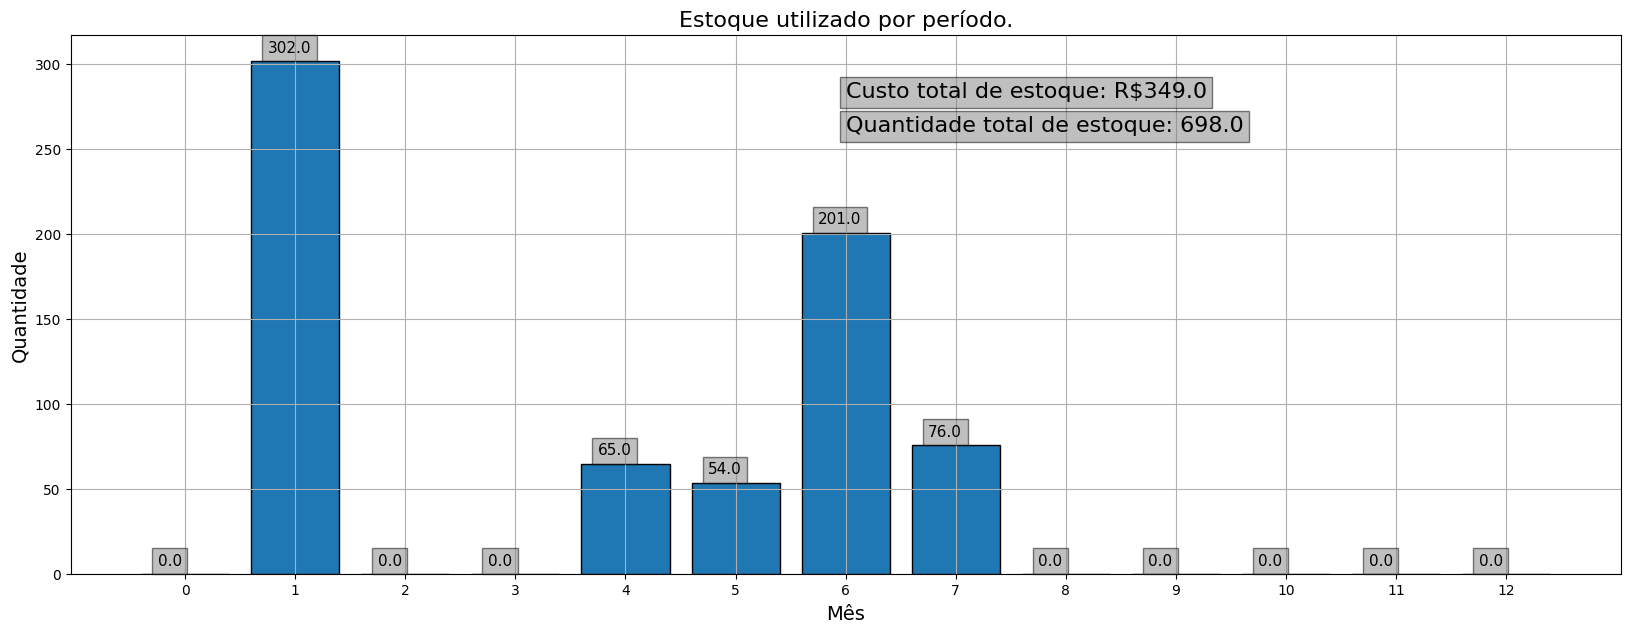

In [26]:
#Plotando o estoque total de cada mês.
if maq==1:
  plt.figure(figsize=[20,7])
  plt.grid()
  plt.title("Estoque utilizado por período.", fontsize=16)
  plt.xlabel("Mês",labelpad=5)
  plt.ylabel("Quantidade")
  plt.bar(tempo2,lh,edgecolor='black',tick_label=tempo2)

  plt.text(-0.5,850,f'Custo total de estoque: R${sum(lh)*0.5}',fontsize=16,bbox=dict(facecolor='grey',alpha=0.5))
  plt.text(-0.5,950,f'Quantidade total de estoque: {sum(lh)}',fontsize=16,bbox=dict(facecolor='grey',alpha=0.5))

  for i in range(0,12):
    plt.text(i-0.25, lh[i] + 20, str(lh[i]),fontsize=11,bbox=dict(facecolor='grey',alpha=0.5))

  plt.show()
else:
  plt.figure(figsize=[20,7])
  plt.grid()
  plt.title("Estoque utilizado por período.",fontsize=16)
  plt.xlabel("Mês",labelpad=5,fontsize=14)
  plt.ylabel("Quantidade",fontsize=14)
  plt.bar(tempo2,lh,edgecolor='black',tick_label=tempo2)

  plt.text(6,260+20,f'Custo total de estoque: R${sum(lh)*0.5}',fontsize=16,bbox=dict(facecolor='grey',alpha=0.5))
  plt.text(6,240+20,f'Quantidade total de estoque: {sum(lh)}',fontsize=16,bbox=dict(facecolor='grey',alpha=0.5))

  for i in range(0,13):
    plt.text(i-0.25, lh[i] + 5, str(lh[i]),fontsize=11,bbox=dict(facecolor='grey',alpha=0.5))

  plt.show()

In [27]:
#Quantidade total produzida em cada mês:
tempo=np.arange(1,13,1)
lp=np.zeros(12)

for j in range(0,12):
  lp[j]=sum(x[(i,k,j)].solution_value() for i in range(0,34) for k in range(0,maq))
print()

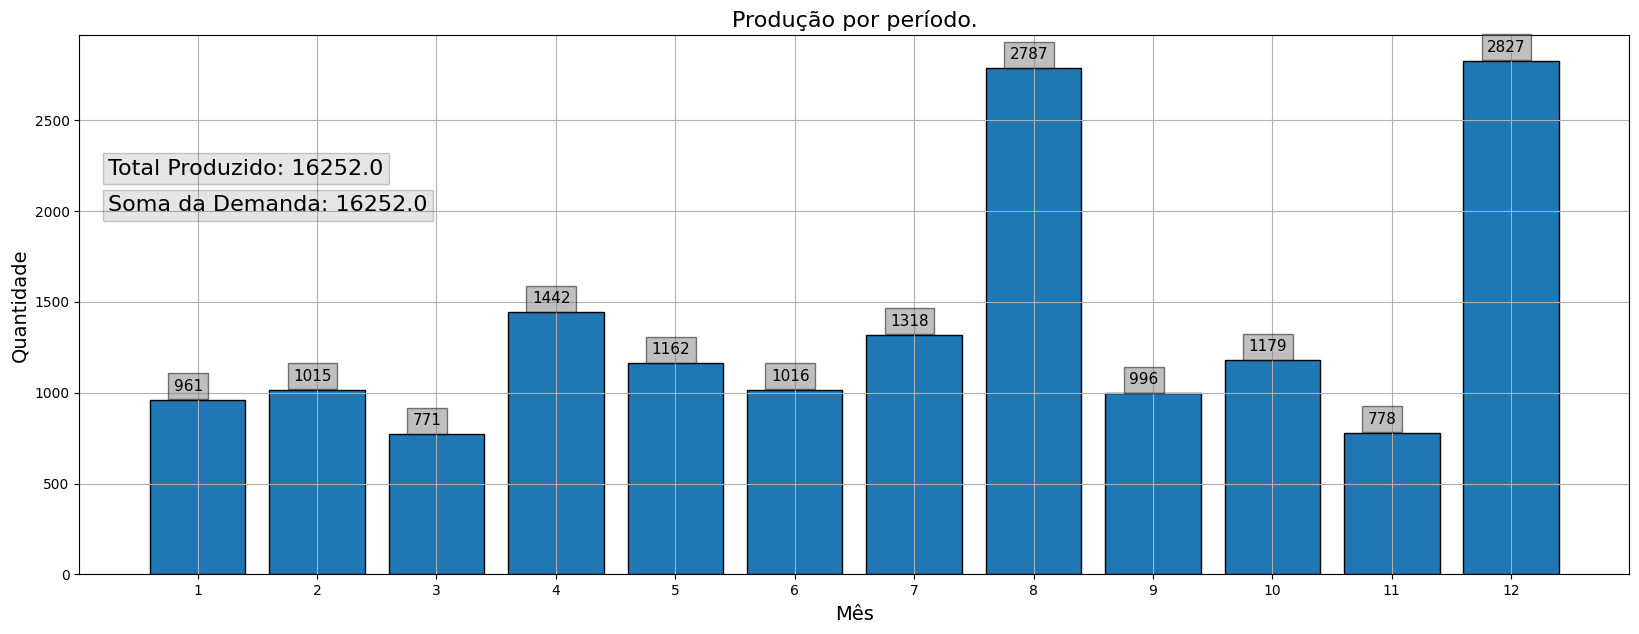

In [28]:
#Plotando a quantidade produzida em cada mês.
plt.figure(figsize=[20,7])
plt.grid()
plt.title("Produção por período.",fontsize=16)
plt.xlabel("Mês",labelpad=5,fontsize=14)
plt.ylabel("Quantidade",fontsize=14)
plt.bar(tempo,lp,edgecolor='black',tick_label=tempo)

demanda=0
demandat=list()
for i in range(0,34):
  for j in range(0,12):
    demanda=0+matriz[i][j]
    demandat.append(demanda)

plt.text(0.25,2200,f'Total Produzido: {sum(lp)}',fontsize=16,bbox=dict(facecolor='grey',alpha=0.2))
plt.text(0.25,2000,f'Soma da Demanda: {sum(demandat)}',fontsize=16,bbox=dict(facecolor='grey',alpha=0.2))
for i in range(0,12):
  plt.text(i+0.8, lp[i] + 50, str(int(lp[i])),fontsize=11,bbox=dict(facecolor='grey',alpha=0.5))
plt.show()



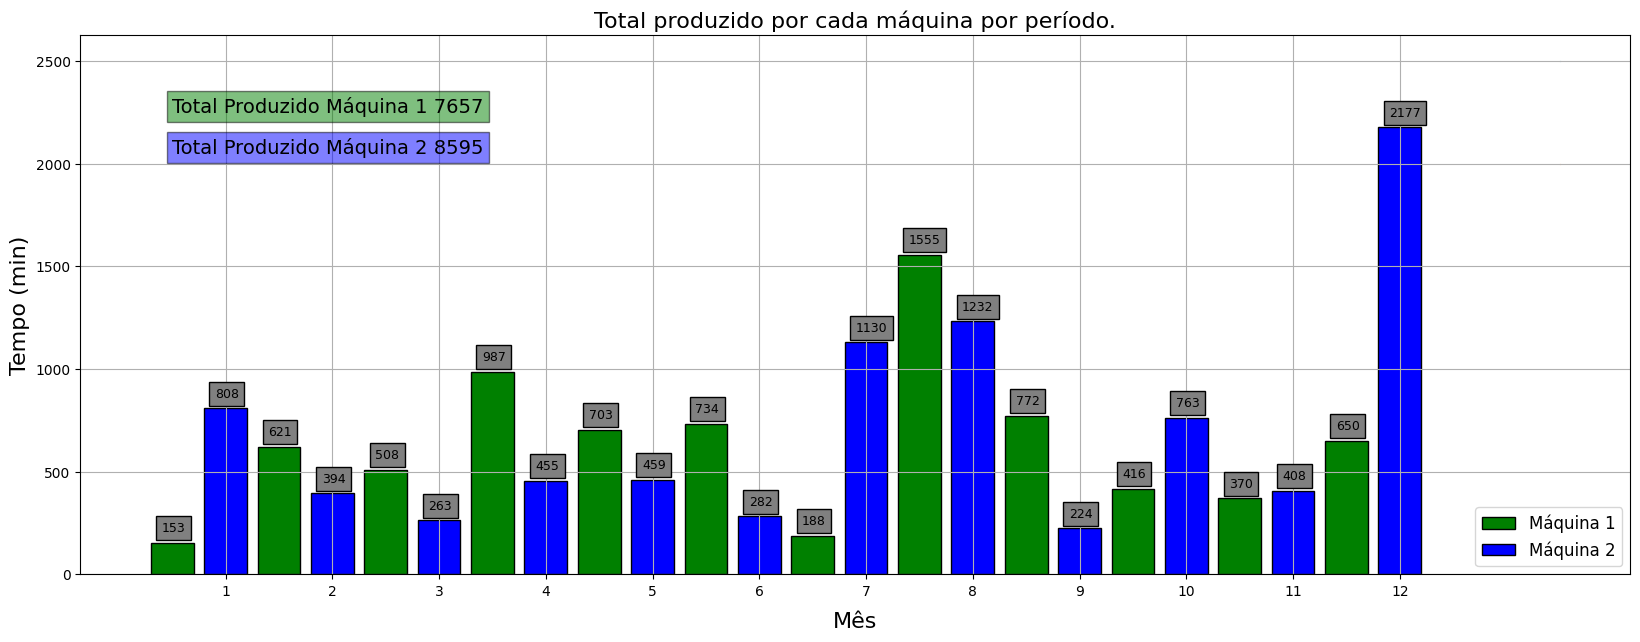

In [29]:
lp1=np.zeros(12)
lp2=np.zeros(12)
if maq==2:
  for j in range(0,12):
    lp1[j]=sum(x[(i,0,j)].solution_value() for i in range(0,34))
    lp2[j]=sum(x[(i,1,j)].solution_value() for i in range(0,34))

  plt.figure(figsize=[20,7])
  plt.grid()
  plt.title(f"Total produzido por cada máquina por período.", fontsize=16)
  plt.xlabel("Mês",labelpad=10,fontsize=16)
  plt.ylabel("Tempo (min)",fontsize=16)
  plt.scatter(14,2500,s=0.001)
  plt.scatter(14,2000,s=0.001)




  plt.bar(tempo,lp1,edgecolor='black',tick_label=tempo,width=0.4,color="g",label="Máquina 1")
  plt.bar(tempo+0.5,lp2,edgecolor='black',tick_label=tempo,width=0.4,color="b",label="Máquina 2")
  for i in range(0,12):
      plt.text(i+0.9,lp1[i]+55, str(int(lp1[i])),fontsize=9,bbox=dict(facecolor='grey',alpha=1))
      plt.text(i+1.4, lp2[i]+55, str(int(lp2[i])),fontsize=9,bbox=dict(facecolor='grey',alpha=1))
  plt.text(1,2250, f"Total Produzido Máquina 1 {str(int(sum(lp1)))}",fontsize=14,bbox=dict(facecolor='g',alpha=0.5))
  plt.text(1,2050 ,f"Total Produzido Máquina 2 {str(int(sum(lp2)))}",fontsize=14,bbox=dict(facecolor='b',alpha=0.5))
  plt.legend(loc="lower right", fontsize=12)
  plt.show()